In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("fake_job_postings.csv")

In [6]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [8]:
df.shape

(17880, 18)

In [9]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

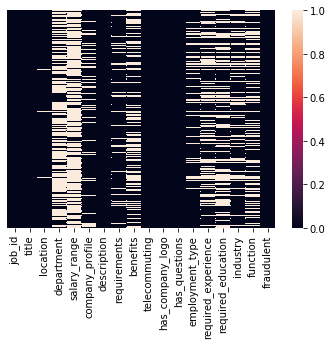

In [11]:
sns.heatmap(df.isnull(),yticklabels=False)

In [12]:
for i in df.columns.tolist():
    if df[i].isnull().sum()>=0:
        print('Feature',i,': {:.2f}%'.format(df[i].isnull().sum()*100/len(df[i])))

Feature job_id : 0.00%
Feature title : 0.00%
Feature location : 1.94%
Feature department : 64.58%
Feature salary_range : 83.96%
Feature company_profile : 18.50%
Feature description : 0.01%
Feature requirements : 15.07%
Feature benefits : 40.32%
Feature telecommuting : 0.00%
Feature has_company_logo : 0.00%
Feature has_questions : 0.00%
Feature employment_type : 19.41%
Feature required_experience : 39.43%
Feature required_education : 45.33%
Feature industry : 27.42%
Feature function : 36.10%
Feature fraudulent : 0.00%


In [13]:
df['title'].value_counts()

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Advertising Sales Reps- Multiple Locations              1
Chief Financial Officer (Hospital Near Casper, WY)      1
ETL Informatica Developer                               1
Recruitment Consultant-Renewables                       1
Senior Computer Vision Engineer                         1
Name: title, Length: 11231, dtype: int64

In [14]:
df['location'].value_counts()

GB, LND, London                      718
US, NY, New York                     658
US, CA, San Francisco                472
GR, I, Athens                        464
US, ,                                339
                                    ... 
US, CA, San Jose, SFO, Austin, OH      1
US, OH, Huber Heights                  1
US, NY, PAINTED POST                   1
US, MN, Burnsville                     1
GB, KTT,                               1
Name: location, Length: 3105, dtype: int64

In [15]:
df['department'].value_counts()

Sales                               551
Engineering                         487
Marketing                           401
Operations                          270
IT                                  225
                                   ... 
Sustainable Home Survey CIC           1
Implementations                       1
Electrical                            1
Conferences i/o                       1
Pawsitive Purrvention TV & Radio      1
Name: department, Length: 1337, dtype: int64

In [16]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

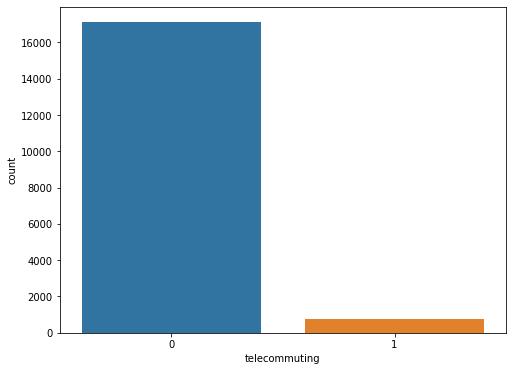

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='telecommuting',data=df)

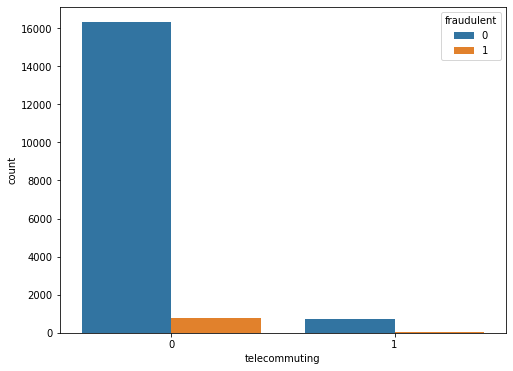

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='telecommuting',hue='fraudulent',data=df)

from the above figure it is clear that most of the job profiles which does not have any telecommuting are not fake

In [19]:
from collections import Counter
Counter(df['has_company_logo'])

Counter({1: 14220, 0: 3660})

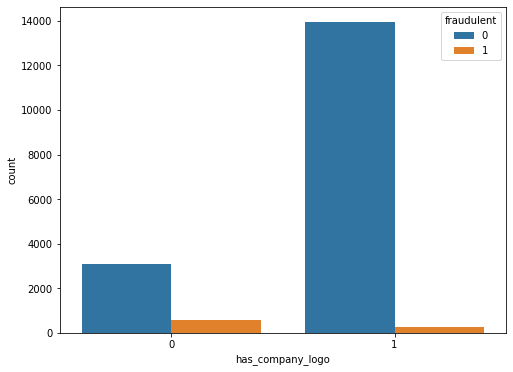

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='has_company_logo',hue='fraudulent',data=df)

In [21]:
df['has_questions'].value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

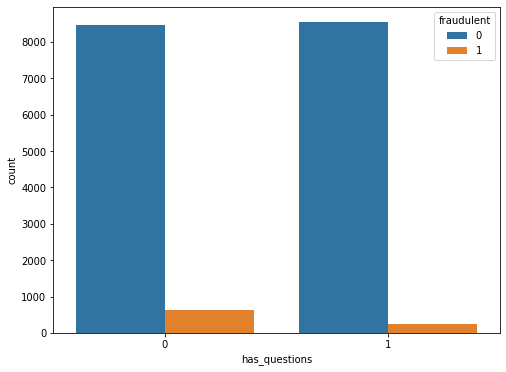

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='has_questions',hue='fraudulent',data=df)

In [23]:
del_cols=['job_id','location','department','salary_range','description','title','company_profile','benefits','requirements']

In [24]:
df=df.drop(del_cols,axis=1)

In [25]:
df.shape

(17880, 9)

In [26]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [27]:
df.dtypes

telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [28]:
col_list=list(df.columns)

In [29]:
for i in col_list:
    if df[i].dtype=='object':
        df[i]=df[i].replace(np.nan,df[i].mode()[0],regex=True)

In [30]:
df.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
for i in col_list:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [33]:
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,2,4,1,58,22,0
1,0,1,0,1,6,1,75,7,0
2,0,1,0,1,5,1,58,18,0
3,0,1,0,1,5,1,22,31,0
4,0,1,1,1,5,1,51,16,0
...,...,...,...,...,...,...,...,...,...
17875,0,1,1,1,5,1,22,31,0
17876,0,1,1,1,5,1,61,0,0
17877,0,0,0,1,5,1,58,18,0
17878,0,0,1,0,6,6,48,9,0


In [34]:
y=df['fraudulent']

In [35]:
x=df.drop(['fraudulent'],axis=1)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
from sklearn.metrics import accuracy_score
pred_1=nb.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [55]:
score_1

0.921420581655481

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
y_pred=dtc.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)

In [53]:
acc_score

0.9667225950782998

In [37]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y=knn.predict(x_test)
    scores=accuracy_score(y_test,pred_y)
    list_1.append(scores)

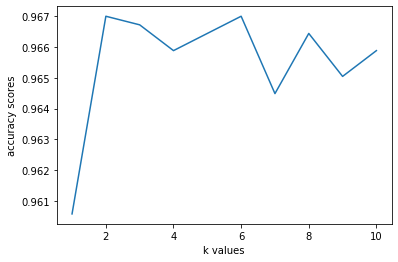

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_1)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [39]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred_2=knn.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [40]:
score_2

0.9667225950782998

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_2))

[[3393   30]
 [  89   64]]


In [42]:
from sklearn.svm import SVC
model=SVC()

In [43]:
model.fit(x_train,y_train)
pred_3=model.predict(x_test)
score_3=accuracy_score(y_test,pred_3)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
score_3

0.9672818791946308

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
pred_4=rfc.predict(x_test)
score_4=accuracy_score(y_test,pred_4)

In [47]:
score_4

0.9739932885906041

In [ ]:
#so from all the classification models RandomForestClassifier gives the best accuracy score

In [56]:
new_df=pd.DataFrame({'actual':y_test,
                    'predicted':pred_4})

In [57]:
new_df

,actual,predicted
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
17843,0,0
5288,0,0
6925,1,0
6152,0,0
